In [ ]:
# https://www.oecd.org/southeast-asia/data/

References :
https://medium.com/@koki_noda/how-to-use-oecd-data-in-python-69a0234c6b27

#1. Pandas_datareader

In [ ]:
import pandas as pd
import datetime as dt
import pandas_datareader.data as web

In [ ]:
start_time = dt.datetime(2000, 1, 1)
end_time = dt.datetime(2022, 2, 1)
df = web.DataReader('HISTPOP', 'oecd', start_time, end_time)

In [ ]:
df

Country      Australia                                                    \
Sex              Women                                                     
Age              Total    0 to 4    5 to 9  10 to 14  15 to 19  20 to 24   
Time                                                                       
2000-01-01   9585337.0  620507.0  653189.0  648099.0  643833.0  630318.0   
2001-01-01   9712875.0  620632.0  653425.0  655629.0  655832.0  635585.0   
2002-01-01   9819727.0  618479.0  650643.0  662322.0  661925.0  646892.0   
2003-01-01   9933140.0  618520.0  647081.0  667589.0  666720.0  663262.0   
2004-01-01  10036771.0  618674.0  645030.0  671148.0  670030.0  677235.0   
2005-01-01  10157211.0  621496.0  643600.0  673833.0  673600.0  694794.0   
2006-01-01  10291542.0  630082.0  645407.0  673156.0  678066.0  712017.0   
2007-01-01  10473986.0  650228.0  647292.0  672906.0  691130.0  725515.0   
2008-01-01  10677154.0  672841.0  651012.0  672814.0  703855.0  743425.0   
2009-01-01  10890856.0  693715.0  656114.0  674651.0  710996.0  767754.0   
2010-01-01  11063919.0  707690.0  662272.0  674485.0  710727.0  780986.0   
2011-01-01  11221790.0  709587.0  675429.0  676322.0  706860.0  788193.0   
2012-01-01  11420486.0  727468.0  690179.0  677461.0  710664.0  797627.0   
2013-01-01  11621964.0  741535.0  709016.0  680087.0  713960.0  806152.0   
2014-01-01  11807800.0  750223.0  727801.0  682553.0  716320.0  813450.0   
2015-01-01  11988343.0  755529.0  747615.0  686064.0  717359.0  819905.0   
2016-01-01  12187868.0  765733.0  763062.0  696242.0  719579.0  829100.0   
2017-01-01  12398090.0  767901.0  772832.0  716032.0  722532.0  840528.0   
2018-01-01  12591646.0  764298.0  781107.0  736646.0  725700.0  849233.0   
2019-01-01  12786368.0  761580.0  788307.0  756676.0  728456.0  850721.0   
2020-01-01  12960329.0  753661.0  792665.0  776691.0  724040.0  831938.0   
2021-01-01  12984295.0  738328.0  795796.0  786589.0  720644.0  790881.0   

Country                                             ...  \
Sex                                                 ...   
Age         25 to 29  30 to 34  35 to 39  40 to 44  ...   
Time                                                ...   
2000-01-01  721080.0  714004.0  752101.0  724739.0  ...   
2001-01-01  699510.0  735150.0  746155.0  740243.0  ...   
2002-01-01  681715.0  751776.0  737748.0  755459.0  ...   
2003-01-01  673022.0  761226.0  730935.0  765722.0  ...   
2004-01-01  668629.0  760318.0  730858.0  770759.0  ...   
2005-01-01  671866.0  755485.0  738508.0  769398.0  ...   
2006-01-01  685377.0  740226.0  758876.0  763479.0  ...   
2007-01-01  708492.0  730822.0  783223.0  757398.0  ...   
2008-01-01  740361.0  730338.0  800808.0  754771.0  ...   
2009-01-01  775995.0  738068.0  808009.0  761613.0  ...   
2010-01-01  800887.0  748621.0  806239.0  774248.0  ...   
2011-01-01  817086.0  766950.0  791706.0  800496.0  ...   
2012-01-01  838756.0  791913.0  781021.0  825658.0  ...   
2013-01-01  857350.0  822405.0  777256.0  839206.0  ...   
2014-01-01  873565.0  850497.0  778551.0  840987.0  ...   
2015-01-01  890360.0  877424.0  787641.0  835962.0  ...   
2016-01-01  906561.0  902024.0  805594.0  819136.0  ...   
2017-01-01  924383.0  924450.0  833090.0  806253.0  ...   
2018-01-01  937224.0  941839.0  865201.0  800767.0  ...   
2019-01-01  949146.0  959375.0  896946.0  802591.0  ...   
2020-01-01  945600.0  975081.0  925945.0  814984.0  ...   
2021-01-01  913677.0  972622.0  943352.0  830846.0  ...   

Country    European Union (27 countries)                           \
Sex                                Total                            
Age                             15 to 64     20 to 64 65 and over   
Time                                                                
2000-01-01                   289284949.0  261590040.5  67321714.0   
2001-01-01                   289389696.0  262027010.0  68403642.5   
2002-01-01                   289969074.5  262846198.0  69505739.0   
2003-

#2. OECD API

## Import Libraries & Settings

In [ ]:
import requests as rq
import pandas as pd
import re

In [ ]:
OECD_ROOT_URL = "http://stats.oecd.org/SDMX-JSON/data"

1. Format -   
    http://stats.oecd.org/SDMX-JSON/data/< dataset identifier>/\<filter expression>/< agency name>[\?< additional parameters>]
2. Parameters
- Dataset identifier
- filter expression
- agency name
- (optional) startPeriod
- (optional) endPeriod
- (optional) dimensionAtObservation
- (optional) detail

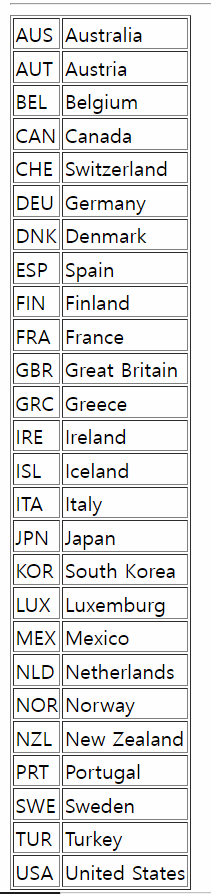

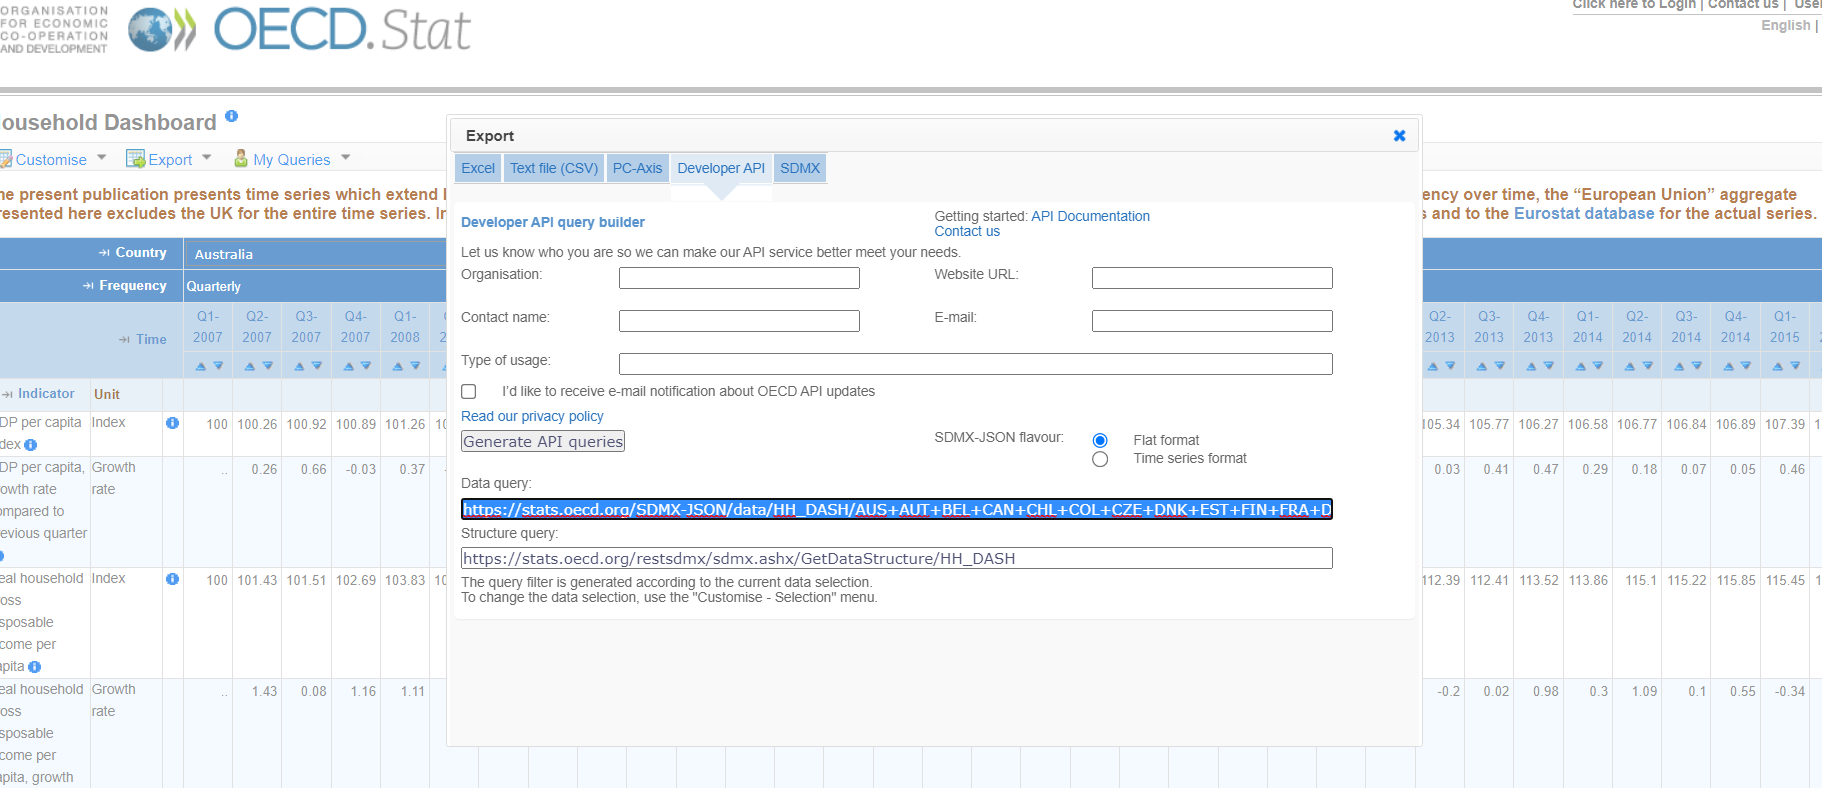

## Fuctions

In [ ]:
def make_OECD_request(dsname, dimensions, params = None, root_dir = OECD_ROOT_URL):
    # Make URL for the OECD API and return a response
    # 4 dimensions: location, subject, measure, frequency

    if not params:
        params = {}

    dim_args = ['+'.join(d) for d in dimensions]
    dim_str = '.'.join(dim_args)

    url = root_dir + '/' + dsname + '/' + dim_str + '/all'

    print('Requesting URL ' + url)
    return rq.get(url = url, params = params)

In [ ]:
def create_DataFrame_from_OECD(country = 'CZE', subject = [], measure = [], frequency = 'M',  startDate = None, endDate = None):     
    # Request data from OECD API and return pandas DataFrame

    # country: country code (max 1)
    # subject: list of subjects, empty list for all
    # measure: list of measures, empty list for all
    # frequency: 'M' for monthly and 'Q' for quarterly time series
    # startDate: date in YYYY-MM (2000-01) or YYYY-QQ (2000-Q1) format, None for all observations
    # endDate: date in YYYY-MM (2000-01) or YYYY-QQ (2000-Q1) format, None for all observations

    # Data download

    response = make_OECD_request('MEI'
                                 , [[country], subject, measure, [frequency]]
                                 , {'startTime': startDate, 'endTime': endDate, 'dimensionAtObservation': 'AllDimensions'})

    # Data transformation

    if (response.status_code == 200):

        responseJson = response.json()
    
        obsList = responseJson.get('dataSets')[0].get('observations')
        if (len(obsList) > 0):

            print('Data downloaded from %s' % response.url)

            timeList = [item for item in responseJson.get('structure').get('dimensions').get('observation') if item['id'] == 'TIME_PERIOD'][0]['values']
            subjectList = [item for item in responseJson.get('structure').get('dimensions').get('observation') if item['id'] == 'SUBJECT'][0]['values']
            measureList = [item for item in responseJson.get('structure').get('dimensions').get('observation') if item['id'] == 'MEASURE'][0]['values']

            obs = pd.DataFrame(obsList).transpose()
            obs.rename(columns = {0: 'series'}, inplace = True)
            obs['id'] = obs.index
            obs = obs[['id', 'series']]
            obs['dimensions'] = obs.apply(lambda x: re.findall('\d+', x['id']), axis = 1)
            obs['subject'] = obs.apply(lambda x: subjectList[int(x['dimensions'][1])]['id'], axis = 1)
            obs['measure'] = obs.apply(lambda x: measureList[int(x['dimensions'][2])]['id'], axis = 1)
            obs['time'] = obs.apply(lambda x: timeList[int(x['dimensions'][4])]['id'], axis = 1)
            obs['names'] = obs['subject'] + '_' + obs['measure']

            data = obs.pivot_table(index = 'time', columns = ['names'], values = 'series')

            return(data)
        else:
            print('Error: No available records, please change parameters')
    else:
        print('Error: %s' % response.status_code)

In [ ]:
data = create_DataFrame_from_OECD(country = 'USA', frequency = 'Q', startDate = '2009-Q1', endDate = '2010-Q1')
from pprint import pprint
pprint(data)

Requesting URL http://stats.oecd.org/SDMX-JSON/data/MEI/USA...Q/all
{'0:0:0:0:0': [18.4433333333333, 0, None, 0, 0, None], '0:0:0:0:1': [18.5333333333333, 0, None, 0, 0, None], '0:0:0:0:2': [18.6533333333333, 0, None, 0, 0, None], '0:0:0:0:3': [18.7933333333333, 0, None, 0, 0, None], '0:0:0:0:4': [18.9, 0, None, 0, 0, None], '0:0:1:0:0': [87.7174903888074, 0, None, 1, 0, 0], '0:0:1:0:1': [88.1455352542507, 0, None, 1, 0, 0], '0:0:1:0:2': [88.7162617415085, 0, None, 1, 0, 0], '0:0:1:0:3': [89.3821093099758, 0, None, 1, 0, 0], '0:0:1:0:4': [89.8894217430938, 0, None, 1, 0, 0], '0:1:2:0:0': [-106.438, 0, None, 0, 1, None], '0:1:2:0:1': [-111.107, 0, None, 0, 1, None], '0:1:2:0:2': [-143.564, 0, None, 0, 1, None], '0:1:2:0:3': [-142.473, 0, None, 0, 1, None], '0:1:2:0:4': [-131.385, 0, None, 0, 1, None], '0:1:3:0:0': [-121.99, 0, None, 0, 1, None], '0:1:3:0:1': [-111.27, 0, None, 0, 1, None], '0:1:3:0:2': [-127.676, 0, None, 0, 1, None], '0:1:3:0:3': [-142.647, 0, None, 0, 1, None], '0:1:3

In [ ]:
data

names,B6BLPI01_CXCU,B6BLPI01_CXCUSA,B6BLPI01_NCCU,B6BLPI01_NCCUSA,B6BLSE01_CXCU,B6BLSE01_CXCUSA,B6BLSE01_NCCU,B6BLSE01_NCCUSA,B6BLSI01_CXCU,B6BLSI01_CXCUSA,...,XTIMVA01_GPSA,XTIMVA01_GYSA,XTIMVA01_NCML,XTIMVA01_NCMLSA,XTIMVA01_STSA,XTNTVA01_CXML,XTNTVA01_CXMLSA,XTNTVA01_NCML,XTNTVA01_NCMLSA,XTNTVA01_STSA
time,,,,,,,,,,,,,,,,,,,,,
2009-Q1,23283.0,21620.0,23283.0,21620.0,23633.0,25185.0,23633.0,25185.0,-22735.0,-22709.0,...,-19.596785,-29.663380,352.786,372.808,10.333603,-106.438,-121.990,-106.438,-121.990,-3.381355
2009-Q2,23499.0,22056.0,23499.0,22056.0,25982.0,28520.0,25982.0,28520.0,-25373.0,-25681.0,...,-3.042853,-34.695559,362.410,361.464,10.053767,-111.107,-111.270,-111.107,-111.270,-3.094866
2009-Q3,34660.0,36888.0,34660.0,36888.0,28165.0,29722.0,28165.0,29722.0,-28087.0,-28044.0,...,9.263716,-29.020646,407.972,394.949,10.933690,-143.564,-127.676,-143.564,-127.676,-3.534557
2009-Q4,34097.0,34975.0,34097.0,34975.0,37142.0,31496.0,37142.0,31496.0,-24301.0,-24063.0,...,8.977108,-7.175100,436.457,430.404,11.750644,-142.473,-142.647,-142.473,-142.647,-3.894467
2010-Q1,41634.0,42194.0,41634.0,42194.0,31199.0,33126.0,31199.0,33126.0,-25685.0,-25708.0,...,4.857297,21.056952,428.351,451.310,12.226804,-131.385,-149.923,-131.385,-149.923,-4.061685
